<h1>Data Mining
<h3>W02 - Class Practice

Tiffany Christabel Anggriawan - 0706022310041

<h3>Part A – Data Preprocessing 

Load the dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

Display the first 5 rows

In [4]:
url = "https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/jabodetabek_house_price.csv"
df = pd.read_csv(url)

In [5]:
df.head()

,url,price_in_rp,title,address,district,city,lat,long,facilities,property_type,...,electricity,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,property_condition,building_orientation,garages,furnishing
0,https://www.rumah123.com/properti/bekasi/hos11...,2.990000e+09,Rumah cantik Sumarecon Bekasi\nLingkungan asri...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Tempat Jemuran, Jalur Telepon, Taman, Taman",rumah,...,4400 mah,0.0,1.0,2.0,5.0,2017.0,bagus,NaN,0.0,unfurnished
1,https://www.rumah123.com/properti/bekasi/hos10...,1.270000e+09,"Rumah Kekinian, Magenta Summarecon Bekasi","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,Taman,rumah,...,2200 mah,0.0,0.0,2.0,NaN,NaN,bagus,NaN,0.0,NaN
2,https://www.rumah123.com/properti/bekasi/hos10...,1.950000e+09,Rumah Cantik 2 Lantai Cluster Bluebell Summare...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Masjid, Taman,...",rumah,...,2200 mah,1.0,1.0,2.0,NaN,NaN,bagus,NaN,1.0,unfurnished
3,https://www.rumah123.com/properti/bekasi/hos10...,3.300000e+09,Rumah Mewah 2Lantai L10x18 C di Cluster VERNON...,"Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jalur Telepon, Jogging Track, Track Lari, K...",rumah,...,3500 mah,1.0,1.0,2.0,6.0,2016.0,bagus sekali,utara,2.0,unfurnished
4,https://www.rumah123.com/properti/bekasi/hos10...,4.500000e+09,"Rumah Hoek di Cluster Maple Summarecon Bekasi,...","Summarecon Bekasi, Bekasi",Summarecon Bekasi,Bekasi,-6.223945,106.986275,"Jogging Track, Kolam Renang, Taman, Jalur Te...",rumah,...,3500 mah,1.0,1.0,2.0,9.0,2013.0,bagus,utara,1.0,unfurnished


Show dataset info, descriptive statistics, and key findings

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   url                   3553 non-null   object 
 1   price_in_rp           3553 non-null   float64
 2   title                 3553 non-null   object 
 3   address               3553 non-null   object 
 4   district              3553 non-null   object 
 5   city                  3553 non-null   object 
 6   lat                   3553 non-null   float64
 7   long                  3553 non-null   float64
 8   facilities            3553 non-null   object 
 9   property_type         3552 non-null   object 
 10  ads_id                3549 non-null   object 
 11  bedrooms              3519 non-null   float64
 12  bathrooms             3524 non-null   float64
 13  land_size_m2          3551 non-null   float64
 14  building_size_m2      3551 non-null   float64
 15  carports             

In [7]:
df.describe()

,price_in_rp,lat,long,bedrooms,bathrooms,land_size_m2,building_size_m2,carports,maid_bedrooms,maid_bathrooms,floors,building_age,year_built,garages
count,3.553000e+03,3553.000000,3553.000000,3519.000000,3524.000000,3551.000000,3551.000000,3553.000000,3553.000000,3553.000000,3547.000000,2108.000000,2108.000000,3553.000000
mean,4.191685e+09,-6.324721,106.792881,3.326513,2.624858,204.806815,186.587440,1.197861,0.496482,0.370391,1.764590,3.880930,2018.137097,0.708978
std,1.375067e+10,0.129245,0.172159,2.672148,2.696497,402.127746,248.443471,1.114996,0.685723,0.536024,0.637349,7.603708,7.641448,1.311879
min,4.200000e+07,-6.894828,106.402315,1.000000,1.000000,12.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1870.000000,0.000000
25%,8.000000e+08,-6.397933,106.687295,2.000000,2.000000,75.000000,65.500000,1.000000,0.000000,0.000000,1.000000,0.000000,2016.000000,0.000000
50%,1.500000e+09,-6.300733,106.799954,3.000000,2.000000,108.000000,112.000000,1.000000,0.000000,0.000000,2.000000,1.000000,2021.000000,0.000000
75%,3.590000e+09,-6.231754,106.874766,4.000000,3.000000,192.000000,208.000000,2.000000,1.000000,1.000000,2.000000,6.000000,2022.000000,1.000000
max,5.800000e+11,-6.102478,109.771691,99.000000,99.000000,8000.000000,6000.000000,15.000000,7.000000,5.000000,5.000000,152.000000,2052.000000,50.000000


In [8]:
print("\nKey Findings from Initial Inspection:")
print(f"- Dataset shape: {df.shape}")
print(f"- Number of categorical features: {len(df.select_dtypes(include='object').columns)}")
print(f"- Number of numerical features: {len(df.select_dtypes(include=['int64', 'float64']).columns)}")
print(f"- Features with missing values: {df.columns[df.isnull().any()].tolist()}")


Key Findings from Initial Inspection:
- Dataset shape: (3553, 27)
- Number of categorical features: 13
- Number of numerical features: 14
- Features with missing values: ['property_type', 'ads_id', 'bedrooms', 'bathrooms', 'land_size_m2', 'building_size_m2', 'certificate', 'floors', 'building_age', 'year_built', 'property_condition', 'building_orientation', 'furnishing']


Identify missing values

In [9]:
print("Missing values in each column:")
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])

Missing values in each column:
property_type              1
ads_id                     4
bedrooms                  34
bathrooms                 29
land_size_m2               2
building_size_m2           2
certificate              141
floors                     6
building_age            1445
year_built              1445
property_condition       246
building_orientation    1647
furnishing               387
dtype: int64


Decide and apply one strategy

In [10]:
for column in df.columns:
    if df[column].isnull().sum() > 0:
        if df[column].dtype in ['int64', 'float64']:
            df[column].fillna(df[column].median(), inplace=True)
        else:
            df[column].fillna(df[column].mode()[0], inplace=True)

C:\Users\user\AppData\Local\Temp\ipykernel_34456\4161582230.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[column].fillna(df[column].mode()[0], inplace=True)
C:\Users\user\AppData\Local\Temp\ipykernel_34456\4161582230.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For 

In [11]:
print("\nMissing values after handling:")
print(df.isnull().sum())


Missing values after handling:
url                     0
price_in_rp             0
title                   0
address                 0
district                0
city                    0
lat                     0
long                    0
facilities              0
property_type           0
ads_id                  0
bedrooms                0
bathrooms               0
land_size_m2            0
building_size_m2        0
carports                0
certificate             0
electricity             0
maid_bedrooms           0
maid_bathrooms          0
floors                  0
building_age            0
year_built              0
property_condition      0
building_orientation    0
garages                 0
furnishing              0
dtype: int64


Decide whether to remove or keep (with justification)

In [12]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

In [13]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

In [14]:
outliers_info = {}
for column in numerical_columns:
    outliers, lower, upper = detect_outliers_iqr(df, column)
    outliers_info[column] = {
        'count': len(outliers),
        'percentage': len(outliers) / len(df) * 100,
        'lower_bound': lower,
        'upper_bound': upper
    }

In [15]:
print("Outliers detection results:")
for col, info in outliers_info.items():
    print(f"{col}: {info['count']} outliers ({info['percentage']:.2f}%)")

print("\nDecision: For this analysis, we'll keep outliers as they might represent genuine property values.")
print("Justification: In real estate data, extreme values often represent legitimate high-end properties rather than errors, so we'll preserve them for analysis.")

Outliers detection results:
price_in_rp: 385 outliers (10.84%)
lat: 40 outliers (1.13%)
long: 7 outliers (0.20%)
bedrooms: 37 outliers (1.04%)
bathrooms: 197 outliers (5.54%)
land_size_m2: 372 outliers (10.47%)
building_size_m2: 327 outliers (9.20%)
carports: 104 outliers (2.93%)
maid_bedrooms: 44 outliers (1.24%)
maid_bathrooms: 11 outliers (0.31%)
floors: 22 outliers (0.62%)
building_age: 752 outliers (21.17%)
year_built: 756 outliers (21.28%)
garages: 95 outliers (2.67%)

Decision: For this analysis, we'll keep outliers as they might represent genuine property values.
Justification: In real estate data, extreme values often represent legitimate high-end properties rather than errors, so we'll preserve them for analysis.


Create new feature using binning (if any)

In [16]:
price_bins = [0, 1e9, 2e9, 5e9, 10e9, df['price_in_rp'].max()]
price_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['price_category'] = pd.cut(df['price_in_rp'], bins=price_bins, labels=price_labels)

In [17]:
print("Price category distribution:")
print(df['price_category'].value_counts())

Price category distribution:
price_category
Very Low     1212
Low           903
Medium        842
Very High     310
High          286
Name: count, dtype: int64


<h3>Part B – Exploratory Data Analysis (EDA) 

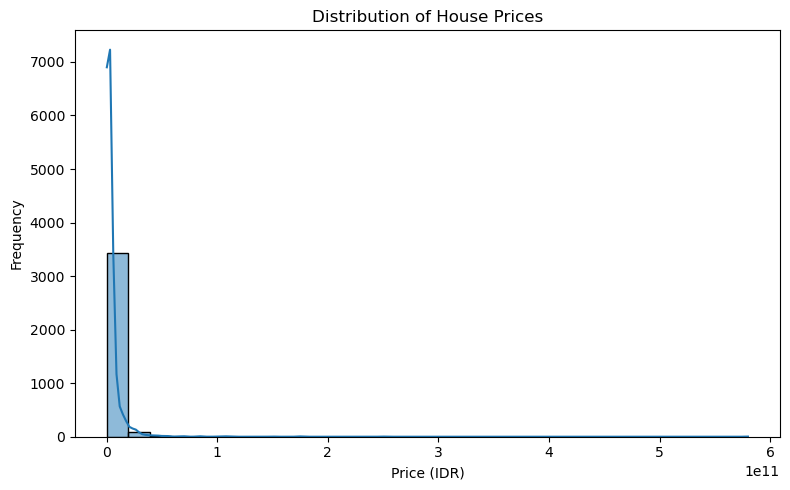

Key Finding: The distribution of house prices is heavily right-skewed, meaning most properties fall within the lower price range while a smaller number of high-value properties drive the tail of the distribution. This suggests that affordable housing dominates the Jabodetabek market, but there is also a significant luxury segment at the upper end.


In [21]:
plt.figure(figsize=(8,5))
sns.histplot(df['price_in_rp'], bins=30, kde=True)
plt.title("Distribution of House Prices")
plt.xlabel("Price (IDR)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()

print("Key Finding: The distribution of house prices is heavily right-skewed, meaning most properties fall within the lower price range while a smaller number of high-value properties drive the tail of the distribution. This suggests that affordable housing dominates the Jabodetabek market, but there is also a significant luxury segment at the upper end.")

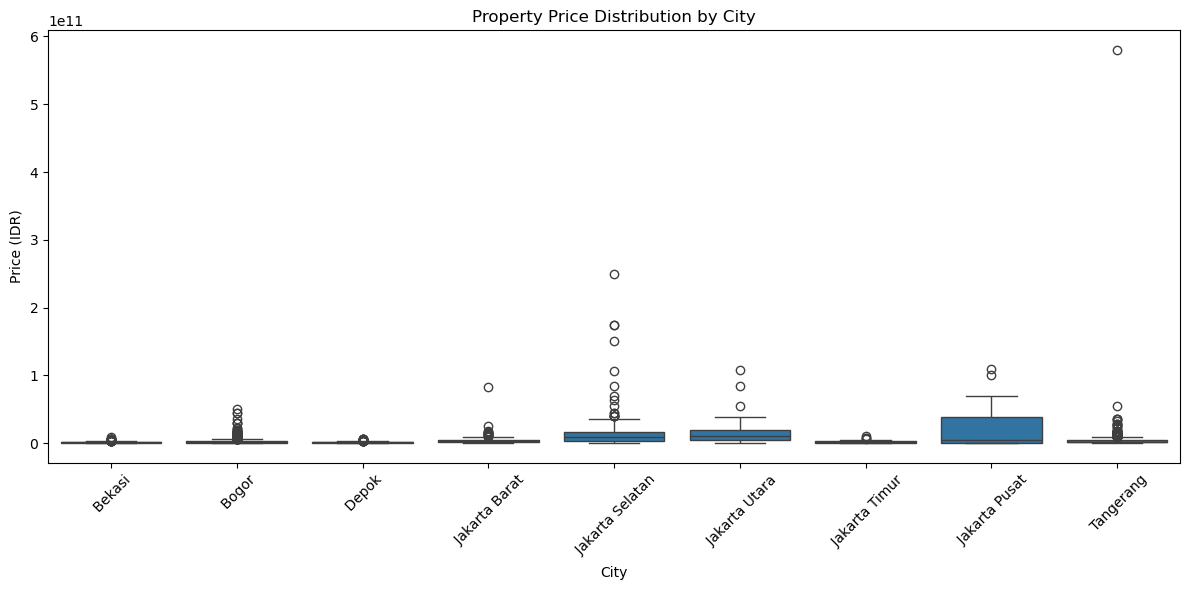

Key Finding: Jakarta Selatan and Jakarta Pusat stand out with the highest median property prices, indicating their premium status within the Jabodetabek housing market. In contrast, cities like Bogor and Tangerang tend to have lower median prices, making them relatively more affordable. However, these areas still display a wider spread of values and more outliers on the higher end, suggesting that luxury properties do exist but are less common.


In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='city', y='price_in_rp')
plt.title('Property Price Distribution by City')
plt.xticks(rotation=45)
plt.ylabel('Price (IDR)')
plt.xlabel('City')
plt.tight_layout()
plt.show()

print("Key Finding: Jakarta Selatan and Jakarta Pusat stand out with the highest median property prices, indicating their premium status within the Jabodetabek housing market. In contrast, cities like Bogor and Tangerang tend to have lower median prices, making them relatively more affordable. However, these areas still display a wider spread of values and more outliers on the higher end, suggesting that luxury properties do exist but are less common.")

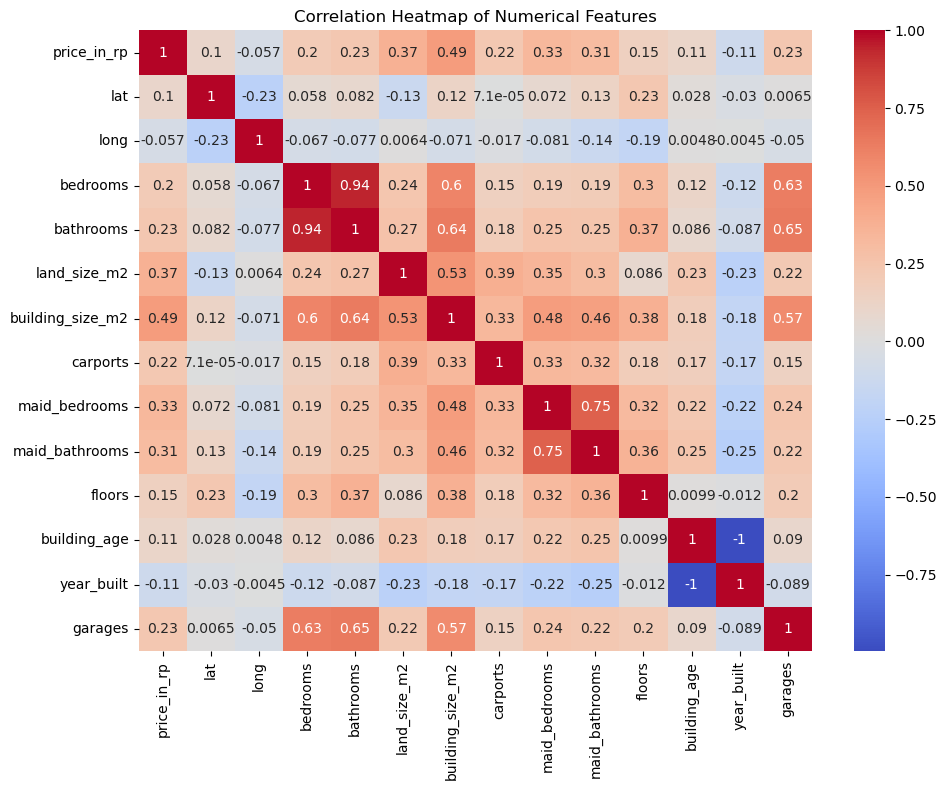

Key Finding: Price shows a moderate positive correlation with both bedroom count and bathroom count, which aligns with expectations that larger properties equipped with more rooms generally command higher prices in the housing market.


In [23]:
corr_matrix = df.select_dtypes(include=['int64', 'float64']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

print("Key Finding: Price shows a moderate positive correlation with both bedroom count and bathroom count, which aligns with expectations that larger properties equipped with more rooms generally command higher prices in the housing market.")

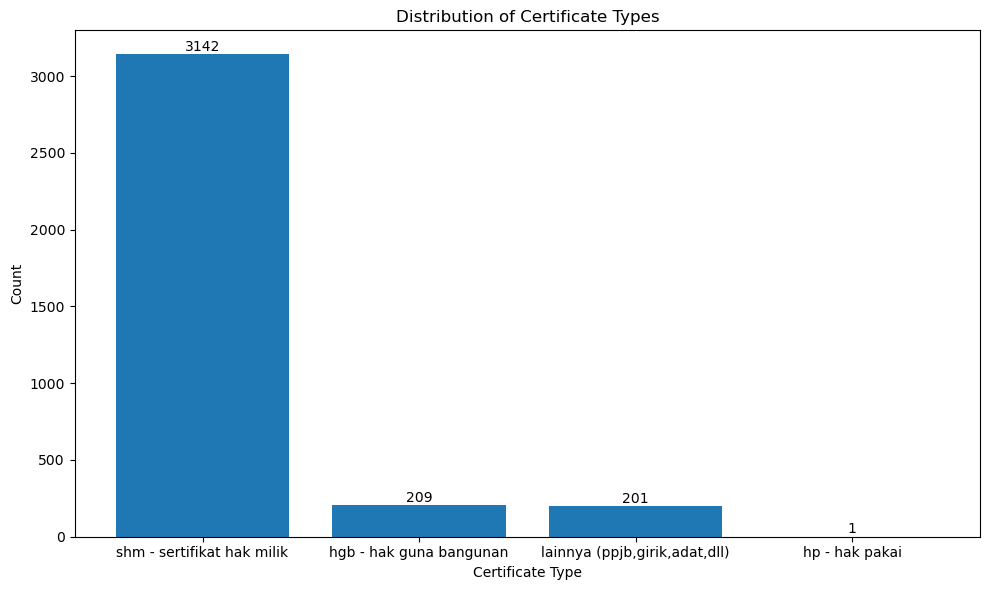

Key Finding: The majority of listed properties are dominated by shm - sertifikat hak milik certificates (3142 properties), indicating that this is the most widely recognized and preferred legal ownership document in the Jabodetabek housing market. Other certificate types exist but are far less common, which may reflect buyer confidence and market demand being strongly tied to secure, standard certificates.


In [24]:
plt.figure(figsize=(10, 6))
certificate_counts = df['certificate'].value_counts()
certificate_types = certificate_counts.index
counts = certificate_counts.values

bars = plt.bar(certificate_types, counts)
plt.title('Distribution of Certificate Types')
plt.xlabel('Certificate Type')
plt.ylabel('Count')

for bar, count in zip(bars, counts):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             str(count), ha='center', va='bottom')

plt.tight_layout()
plt.show()

print("Key Finding: The majority of listed properties are dominated by "
      f"{certificate_counts.idxmax()} certificates ({certificate_counts.max()} properties), "
      "indicating that this is the most widely recognized and preferred legal ownership document in the Jabodetabek housing market. "
      "Other certificate types exist but are far less common, which may reflect buyer confidence and market demand being strongly tied "
      "to secure, standard certificates.")

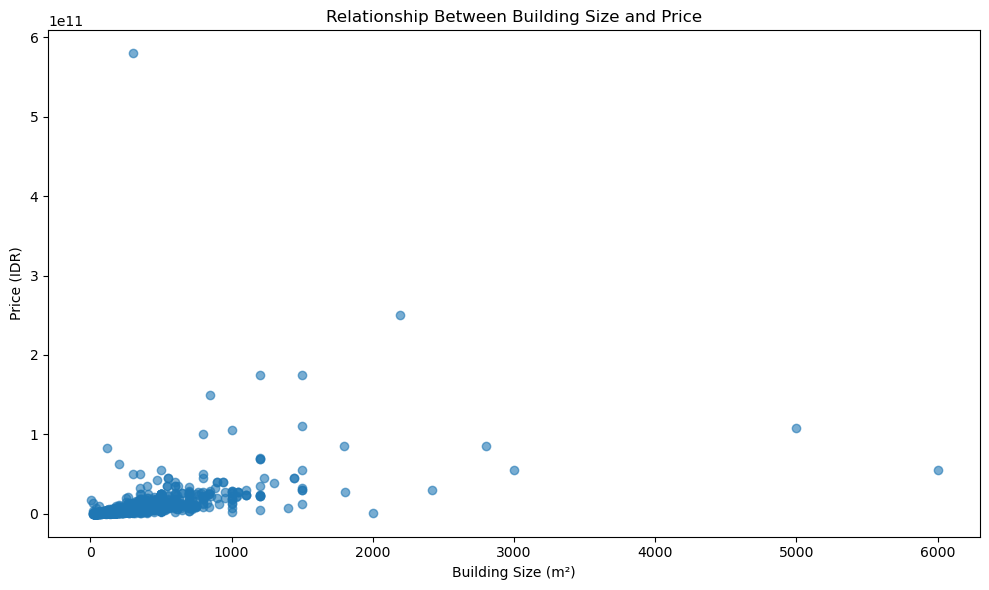

Key Finding: There is a clear positive relationship between building size and price—larger properties generally cost more. However, the trend is not perfectly linear, as some smaller properties still command very high prices. This suggests that additional factors, such as location, land size, or property type, significantly influence price beyond just building size.


In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(df['building_size_m2'], df['price_in_rp'], alpha=0.6)
plt.title('Relationship Between Building Size and Price')
plt.xlabel('Building Size (m²)')
plt.ylabel('Price (IDR)')
plt.tight_layout()
plt.show()

print("Key Finding: There is a clear positive relationship between building size and price—larger properties generally cost more. However, the trend is not perfectly linear, as some smaller properties still command very high prices. This suggests that additional factors, such as location, land size, or property type, significantly influence price beyond just building size.")

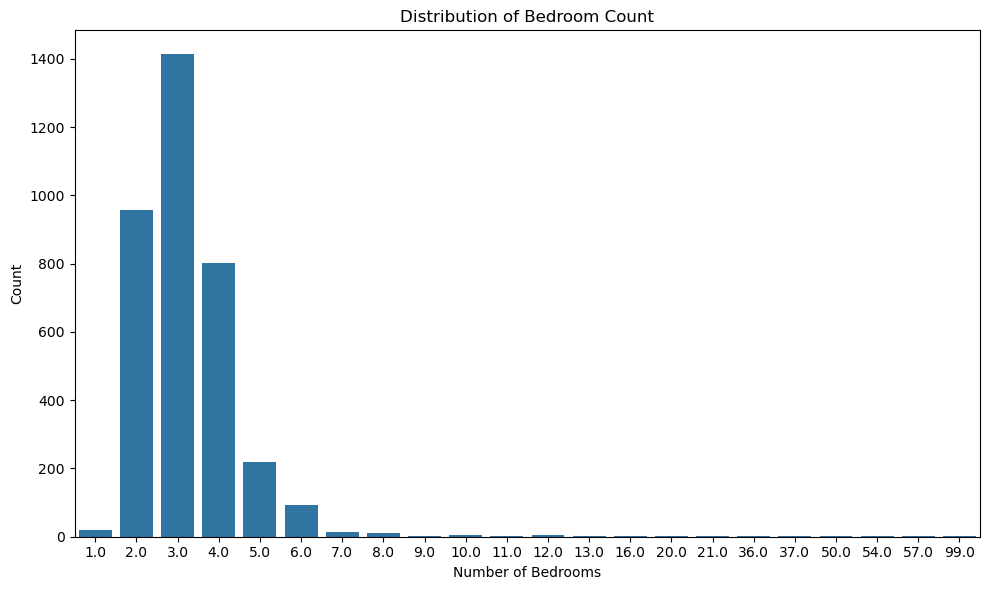

Key Finding: Properties with 3 to 4 bedrooms are the most common in the dataset, suggesting that mid-sized family homes are the most prevalent and possibly the most in-demand housing configuration in the Jabodetabek area. Smaller units with 1–2 bedrooms and larger houses with 5 or more bedrooms exist but are less frequent, indicating niche market segments compared to the dominant 3–4 bedroom properties.


In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='bedrooms')
plt.title('Distribution of Bedroom Count')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

print("Key Finding: Properties with 3 to 4 bedrooms are the most common in the dataset, suggesting that mid-sized family homes are the most prevalent and possibly the most in-demand housing configuration in the Jabodetabek area. Smaller units with 1–2 bedrooms and larger houses with 5 or more bedrooms exist but are less frequent, indicating niche market segments compared to the dominant 3–4 bedroom properties.")

<Figure size 1200x600 with 0 Axes>

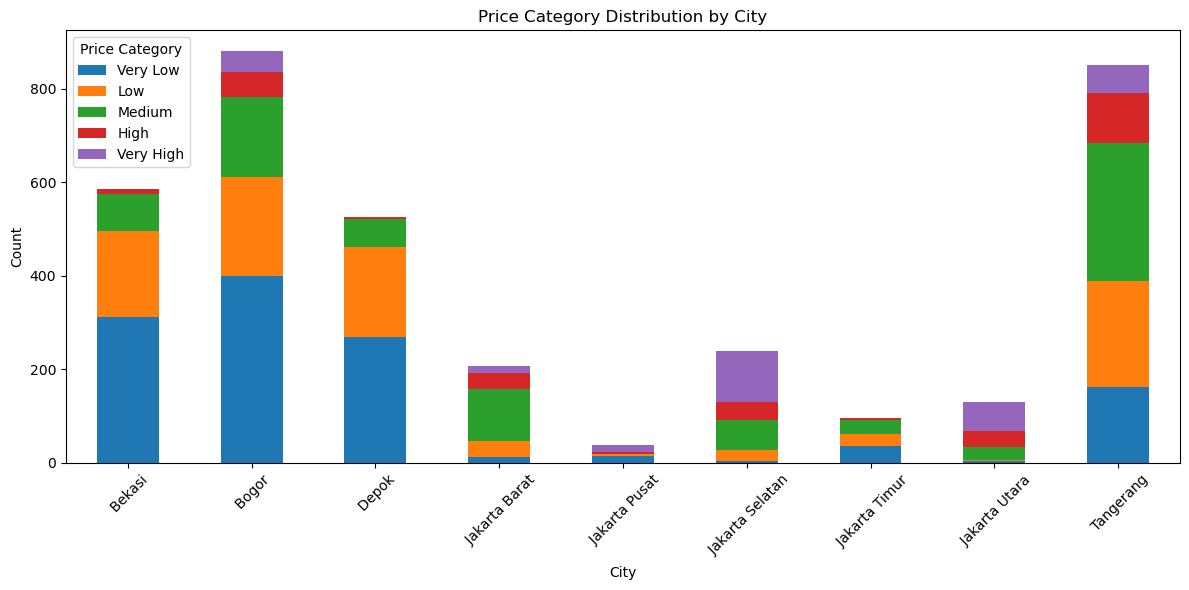

Key Finding: Jakarta Selatan has the highest proportion of properties in the 'Very High' price category, reinforcing its reputation as a premium residential market within Jabodetabek. In contrast, most other cities such as Bogor, Depok, and Tangerang are dominated by properties in the 'Low' to 'Medium' categories, reflecting more affordable housing markets. This contrast highlights how location strongly influences housing affordability and price segmentation across the region.


In [27]:
plt.figure(figsize=(12, 6))
cross_tab = pd.crosstab(df['city'], df['price_category'])
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Price Category Distribution by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Price Category')
plt.tight_layout()
plt.show()

print("Key Finding: Jakarta Selatan has the highest proportion of properties in the 'Very High' price category, reinforcing its reputation as a premium residential market within Jabodetabek. In contrast, most other cities such as Bogor, Depok, and Tangerang are dominated by properties in the 'Low' to 'Medium' categories, reflecting more affordable housing markets. This contrast highlights how location strongly influences housing affordability and price segmentation across the region.")